___
# Projeto 2 CDados
___

O principal objetivo do Projeto 2 é prever uma variável principal em função de
demais outras variáveis que podem influenciar em seu comportamento.

## Quais fatores escolhidos impactam na taxa de fertilidade dos países?
Os fatores por país escolhidos são:
- Anos de escolaridade de mulheres de 15-24 anos
- Taxa de emissão de CO2
- PIB 
- Expectativa de vida
- Densidade populacional
- Mortalidade infantil
- IDH
- Saneamento básico

https://www.gapminder.org/data/

In [1124]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot, stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [1125]:
#Leitura dos arquivos Excel
fertilidade = pd.read_excel('bebes_por_mulher.xlsx') #bebês por mulher

escolaridade_anos = pd.read_excel('anos_na_escola_mulheres15-24.xlsx') #anos na escola, mulheres 15-24
emissao_co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx') #toneladas por pessoa
pib_capita = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx') #PIB per capita
expectativa_vida = pd.read_excel('life_expectancy_years.xlsx') # em anos
densidade_populacional = pd.read_excel('population_density_per_square_km.xlsx', index_col=None) #por km²
mortalidade_infantil = pd.read_excel('child_mortality_0_5_year_olds_dying_per_1000_born.xlsx') #0-5 por 1000
idh = pd.read_excel('hdi_human_development_index.xlsx') #Índice de desenvolvimento Humano
saneamento_basico = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx') # %

In [1126]:
#Cada linha representa um país e as colunas representam o ano
densidade_populacional.head(4)

,country,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,211,213,216,223,232,243,255,268,281,...,576,575,574,573,572,572,571,570,569,568
1,Afghanistan,11.9,12,12.2,12.3,12.5,12.7,12.9,13.1,13.3,...,117,117,117,117,116,116,116,115,115,115
2,Angola,3.65,3.7,3.78,3.87,3.96,4.05,4.12,4.19,4.26,...,135,136,138,140,142,144,146,147,149,151
3,Anguilla,56.9,59.1,60.9,62.2,63.4,64.2,65,65.6,66,...,158,157,156,156,155,154,154,153,152,152


# Inner Join

In [1127]:
#Construindo DF, juntando os dados
fertilidade_index = fertilidade.set_index('country')

escolaridade_anos_index = escolaridade_anos.set_index('country')
emissao_co2_index = emissao_co2.set_index('country')
pib_capita_index = pib_capita.set_index('country')
expectativa_vida_index = expectativa_vida.set_index('country')
densidade_populacional_index = densidade_populacional.set_index('country')
mortalidade_infantil_index = mortalidade_infantil.set_index('country')
idh_index = idh.set_index('country')
saneamento_basico_index = saneamento_basico.set_index('country')

In [1128]:
#Juntando no DF os dados somente do ano de 2008 para futuramente realizar uma análise
df1 = fertilidade_index.join(escolaridade_anos_index, how='outer', lsuffix='_fertilidade', rsuffix='_escolaridade')
df1 = df1[['2008_fertilidade','2008_escolaridade']].copy()
df1.head()

,2008_fertilidade,2008_escolaridade
country,,
Afghanistan,6.04,1.77
Albania,1.65,10.70
Algeria,2.83,9.28
Andorra,NaN,15.40
Angola,6.24,5.16


In [1129]:
df2 = df1.join(emissao_co2_index, how='outer')
df2 = df2[['2008_fertilidade','2008_escolaridade', 2008]].copy()
df2 = df2.rename(columns={2008: '2008_emissao co2'})

In [1130]:
df3 = df2.join(pib_capita_index, how='outer')
df3 = df3[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', 2008]].copy()
df3 = df3.rename(columns={2008: '2008_pib capita'})

In [1131]:
df4 = df3.join(expectativa_vida_index, how='outer')
df4 = df4[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', 2008]].copy()
df4 = df4.rename(columns={2008: '2008_expectativa vida'})

In [1132]:
df5 = df4.join(densidade_populacional_index, how='outer')
df5 = df5[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', 2008]].copy()
df5 = df5.rename(columns={2008: '2008_densidade populacional'})

In [1133]:
df6 = df5.join(mortalidade_infantil_index, how='outer')
df6 = df6[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', '2008_densidade populacional', 2008]].copy()
df6 = df6.rename(columns={2008: '2008_mortalidade infantil'})

In [1134]:
df7 = df6.join(idh_index, how='outer')
df7 = df7[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', '2008_densidade populacional', '2008_mortalidade infantil', 2008]].copy()
df7 = df7.rename(columns={2008: '2008_idh'})

In [1135]:
df = df7.join(saneamento_basico_index, how='outer')
df = df[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', '2008_densidade populacional', '2008_mortalidade infantil', '2008_idh', 2008]].copy()
df = df.rename(columns={2008: '2008_saneamento_basico'})
df.head(3)

,2008_fertilidade,2008_escolaridade,2008_emissao co2,2008_pib capita,2008_expectativa vida,2008_densidade populacional,2008_mortalidade infantil,2008_idh,2008_saneamento_basico
country,,,,,,,,,
Afghanistan,6.04,1.77,0.238,488.0,59.9,43.5,91.9,0.447,32.9
Albania,1.65,10.70,1.470,3930.0,78.0,109.0,14.4,0.729,94.9
Algeria,2.83,9.28,3.400,4400.0,74.2,14.8,28.3,0.720,86.3


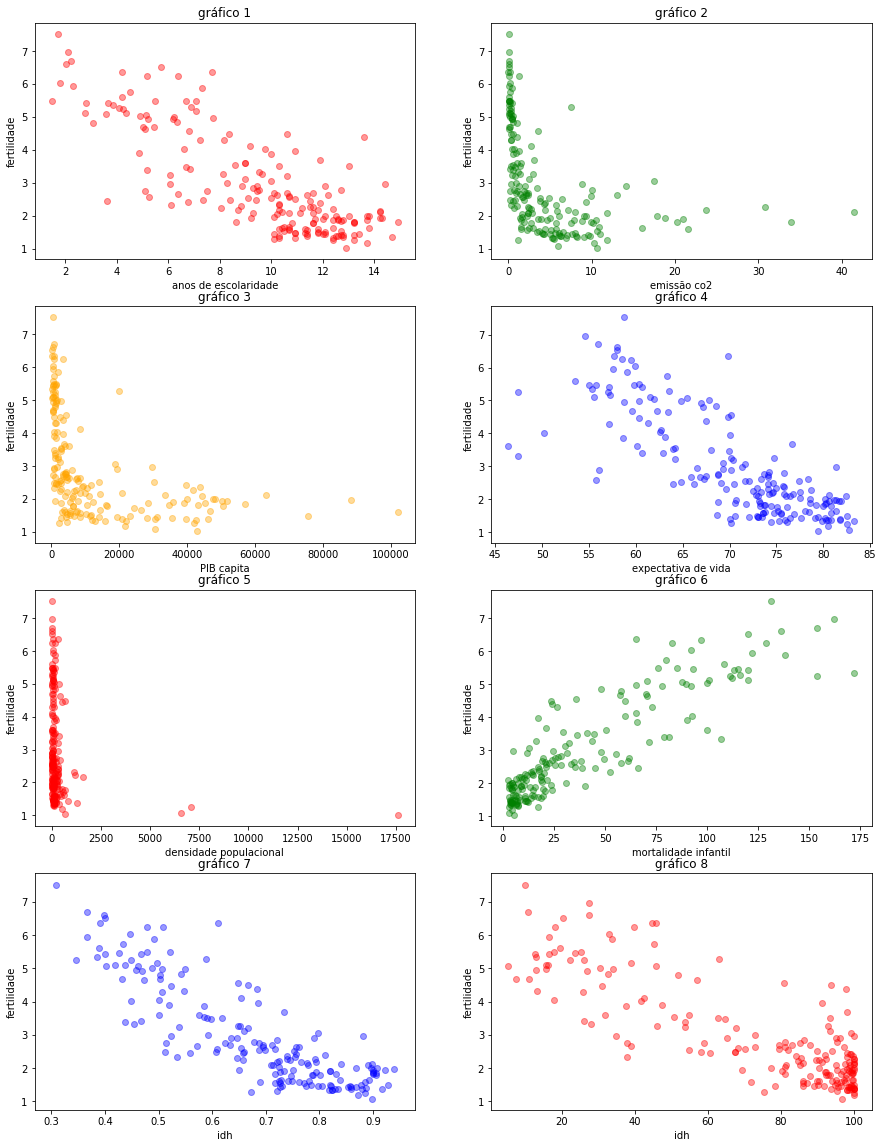

In [1136]:
#Plota gráficos das variáveis do DF em relação a fertilidade para fazer uma análise de quais variáveis representam uma normal
fig = plt.figure(figsize=(15, 20)) #tamanho das figuras

plt.subplot(4, 2, 1) #quant de linhas, quant colunas e "índice"
plt.scatter(df['2008_escolaridade'], df['2008_fertilidade'], c='red', alpha=0.4)
plt.title('gráfico 1')
plt.xlabel('anos de escolaridade')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 2) 
plt.scatter(df['2008_emissao co2'], df['2008_fertilidade'], c='green', alpha=0.4)
plt.title('gráfico 2')
plt.xlabel('emissão co2')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 3)
plt.scatter(df['2008_pib capita'], df['2008_fertilidade'], c='orange', alpha=0.4)
plt.title('gráfico 3')
plt.xlabel('PIB capita')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 4) 
plt.scatter(df['2008_expectativa vida'], df['2008_fertilidade'], c='blue', alpha=0.4)
plt.title('gráfico 4')
plt.xlabel('expectativa de vida')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 5) 
plt.scatter(df['2008_densidade populacional'], df['2008_fertilidade'], c='red', alpha=0.4)
plt.title('gráfico 5')
plt.xlabel('densidade populacional')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 6) 
plt.scatter(df['2008_mortalidade infantil'], df['2008_fertilidade'], c='green', alpha=0.4)
plt.title('gráfico 6')
plt.xlabel('mortalidade infantil')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 7) 
plt.scatter(df['2008_idh'], df['2008_fertilidade'], c='blue', alpha=0.4)
plt.title('gráfico 7')
plt.xlabel('idh')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 8) 
plt.scatter(df['2008_saneamento_basico'], df['2008_fertilidade'], c='red', alpha=0.4)
plt.title('gráfico 8')
plt.xlabel('idh')
plt.ylabel('fertilidade')

plt.show()

## Análise dos gráficos

Gráfico 1:
Analisando o primeiro gráfico, percebemos que a tendencia é que paises com menor escolaridade têm uma maior taxa de fertilidade. Isso acontece pois em países de menor escolaridade, os metodos contraceptivos são menos conhecidos, portanto, são menos utilizados. Além disso, o gráfico é aparentemete uma normal.

Gráfico 2:
No segundo gráfico, observamos diferentes taxas de fertilidade para países com baixa emissão de carbono, porém quanto mais essa taxa de emissão aumenta, os valores de fertilidade passam a diminuir. O gráfico 2 se assemelha a uma exponencial.

Gráfico 3:
O terceiro gráfico é bem parecido com o segundo, para o PIB per capta menor, há países com diferentes taxas de fertilidade, mas quando o PIB per capta aumenta, a fertilidade passa a ser menor. O gráfico 3 também se assemelha a uma exponencial.

Gráfico 4:
No gráfico 4 observamos uma tendência de países que tem uma menor expectativa de vida, terem uma maior taxa de fertilidade. Isso ocorre pois países com expectativas de vidas altas são normalmente muito desenvolvidos na área da saúde. Esse alto desenvolvimento também concientiza a população sobre metodos contraceptivos, diminuindo a taxa de fertilidade. O quarto gráfico se assemelha a uma distribuição normal.

Gráfico 5:
Mostra que devído à escala, as duas variáveis não tem muita relação

Gráfico 6:
Mostra que paises com maior taxa de mortalidade, as pessoas tendem a ter mais filhos, e seu gráfico se assemelha a uma distribuição normal

Gráfico 7:
Mostra que a medida que o idh sobe a fertilidade desce, sendo assim, em paises com maior qualidade de vida as pessoas tendem a ter menos filhos, parecendo ser uma normal.

Gráfico 8:
Mostra como paises com melhor saneamento básico, normalmente tem menor taxa de fertilidade, parecendo ser uma normal.


In [1137]:
#Correlação entre as variáveis features e a target para confirmar se elas são dependentes
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


corr_fertilidade_escolaridade = df['2008_fertilidade'].corr(df['2008_escolaridade'])
print(f'Correlação entre fertildade e escolaridade é: {corr_fertilidade_escolaridade}')

corr_fertilidade_emissao_co2 = df['2008_fertilidade'].corr(df['2008_emissao co2'])
print(f'Correlação entre fertildade e emissão de co2 é: {corr_fertilidade_emissao_co2}')

corr_fertilidade_pib_capita = df['2008_fertilidade'].corr(df['2008_pib capita'])
print(f'Correlação entre fertildade e PIB per capita é: {corr_fertilidade_pib_capita}')

corr_fertilidade_expectativa_vida = df['2008_fertilidade'].corr(df['2008_expectativa vida'])
print(f'Correlação entre fertildade e expectativa de vida é: {corr_fertilidade_expectativa_vida}')

corr_fertilidade_densidade_populacional = df['2008_fertilidade'].corr(df['2008_densidade populacional'])
print(f'Correlação entre fertildade e densidade populacional é: {corr_fertilidade_densidade_populacional}')

corr_fertilidade_mortalidade_infantil = df['2008_fertilidade'].corr(df['2008_mortalidade infantil'])
print(f'Correlação entre fertildade e mortalidade infantil é: {corr_fertilidade_mortalidade_infantil}')

corr_fertilidade_idh = df['2008_fertilidade'].corr(df['2008_idh'])
print(f'Correlação entre fertildade e IDH é: {corr_fertilidade_idh}')

corr_fertilidade_saneamento_basico = df['2008_fertilidade'].corr(df['2008_saneamento_basico'])
print(f'Correlação entre fertildade e saneamento básico é: {corr_fertilidade_idh}')

Correlação entre fertildade e escolaridade é: -0.8056395759686067
Correlação entre fertildade e emissão de co2 é: -0.45559333546623065
Correlação entre fertildade e PIB per capita é: -0.47306779452084224
Correlação entre fertildade e expectativa de vida é: -0.7900145559235219
Correlação entre fertildade e densidade populacional é: -0.16622970028322878
Correlação entre fertildade e mortalidade infantil é: 0.8841527154496786
Correlação entre fertildade e IDH é: -0.853528335611538
Correlação entre fertildade e saneamento básico é: -0.853528335611538


In [1138]:
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [1139]:
'''
Decidimos, a partir da análise dos gráficos e os valores de correlação, não adotar os valores fracos de correlação, 
ou seja, os que são abaixo de 0,5. Deste modo, vamos deixar de adotar em nossa análise as variáveis:

- Emissão de CO2
- PIB per capita
- Densidade populacional

Assim sendo, vamos trabalhar com as variáveis:

- Escolaridade
- Expectativa de vida
- Mortalidade infantil 
- IDH
- Saneamento básico
'''

'\nDecidimos, a partir da análise dos gráficos e os valores de correlação, não adotar os valores fracos de correlação, \nou seja, os que são abaixo de 0,5. Deste modo, vamos deixar de adotar em nossa análise as variáveis:\n\n- Emissão de CO2\n- PIB per capita\n- Densidade populacional\n\nAssim sendo, vamos trabalhar com as variáveis:\n\n- Escolaridade\n- Expectativa de vida\n- Mortalidade infantil \n- IDH\n- Saneamento básico\n'

In [1140]:
#Tirando as variáveis que não iremos utilizar
df = df.drop(columns=['2008_emissao co2'])
df = df.drop(columns=['2008_pib capita'])
df = df.drop(columns=['2008_densidade populacional'])

In [1141]:
df

,2008_fertilidade,2008_escolaridade,2008_expectativa vida,2008_mortalidade infantil,2008_idh,2008_saneamento_basico
country,,,,,,
Afghanistan,6.04,1.77,59.9,91.90,0.447,32.9
Albania,1.65,10.70,78.0,14.40,0.729,94.9
Algeria,2.83,9.28,74.2,28.30,0.720,86.3
American Samoa,NaN,NaN,NaN,NaN,NaN,63.7
Andorra,NaN,15.40,81.8,4.39,0.830,100.0
...,...,...,...,...,...,...
Wallis et Futuna,NaN,NaN,NaN,NaN,NaN,NaN
Western Sahara,2.56,NaN,NaN,NaN,NaN,NaN
Yemen,4.80,3.08,67.2,58.00,0.503,51.7


In [1142]:
'''
Optamos por retirar os NaNs porque a maioria dos países que possuía alguma variável NaN, não tinha nenhuma informação, como American Samoa.
'''

'\nOptamos por retirar os NaNs porque a maioria dos países que possuía alguma variável NaN, não tinha nenhuma informação, como American Samoa.\n'

In [1143]:
#Removendo os NaNs 
df_dropNaNs = df[['2008_fertilidade','2008_escolaridade', '2008_expectativa vida', '2008_mortalidade infantil', '2008_idh', '2008_saneamento_basico']].dropna()
df_dropNaNs

,2008_fertilidade,2008_escolaridade,2008_expectativa vida,2008_mortalidade infantil,2008_idh,2008_saneamento_basico
country,,,,,,
Afghanistan,6.04,1.77,59.9,91.9,0.447,32.9
Albania,1.65,10.70,78.0,14.4,0.729,94.9
Algeria,2.83,9.28,74.2,28.3,0.720,86.3
Angola,6.24,5.16,59.5,129.0,0.508,39.8
Antigua and Barbuda,2.15,14.20,75.8,10.2,0.776,85.9
...,...,...,...,...,...,...
Venezuela,2.50,10.90,74.6,17.0,0.752,93.9
Vietnam,1.94,9.22,73.1,23.4,0.650,69.2
Yemen,4.80,3.08,67.2,58.0,0.503,51.7


Correlação entre fertildade e mortalidade infantil é: 0.8841527154496786
Correlação entre fertildade e IDH é: -0.853528335611538
count    197.000000
mean      38.608223
std       39.621430
min        2.720000
25%        8.690000
50%       20.900000
75%       59.600000
max      172.000000
Name: 2008_mortalidade infantil, dtype: float64
count    186.000000
mean       0.678000
std        0.157773
min        0.309000
25%        0.539500
50%        0.715500
75%        0.797750
max        0.938000
Name: 2008_idh, dtype: float64


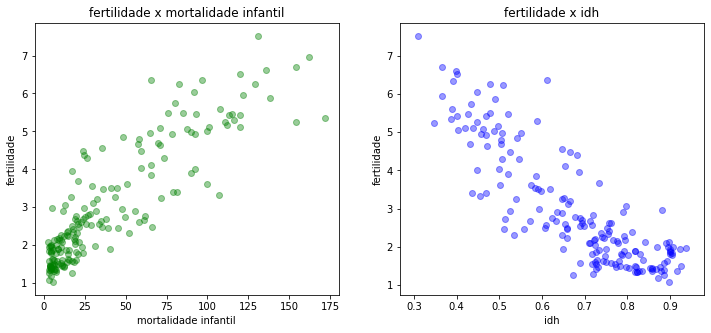

In [1144]:
#Análise da martalidade e IDH
corr_fertilidade_mortalidade_infantil = df['2008_fertilidade'].corr(df['2008_mortalidade infantil'])
print(f'Correlação entre fertildade e mortalidade infantil é: {corr_fertilidade_mortalidade_infantil}')

corr_fertilidade_idh = df['2008_fertilidade'].corr(df['2008_idh'])
print(f'Correlação entre fertildade e IDH é: {corr_fertilidade_idh}')

fig = plt.figure(figsize=(12, 5)) #tamanho das figuras

plt.subplot(1, 2, 1) 
plt.scatter(df['2008_mortalidade infantil'], df['2008_fertilidade'], c='green', alpha=0.4)
plt.title('fertilidade x mortalidade infantil')
plt.xlabel('mortalidade infantil')
plt.ylabel('fertilidade')

plt.subplot(1, 2, 2) 
plt.scatter(df['2008_idh'], df['2008_fertilidade'], c='blue', alpha=0.4)
plt.title('fertilidade x idh')
plt.xlabel('idh')
plt.ylabel('fertilidade')

print(df['2008_mortalidade infantil'].describe())

print( df['2008_idh'].describe())

Analisando o IDH e a mortalidade infantil em relação a taxa de fertilidade, apesar dos dois gráficos terem uma concentração de dados maior em uma de suas extremidades, porque suas médias não estão perto do valor da metade do gráfico, sendo que a fertilidade mais concentrada pra esquerda e crescente e a mortalidade concentrada mais para a direita e decrescente, temos a percepção que os dois aparentemente são uma curva de uma distribuição normal. Além disso, ambos possuem uma forte correlação.

In [1145]:
#Dividindo o DF em treino e teste para poder prever a partir do treino e comparar com o teste

from sklearn.model_selection import train_test_split

treino, teste = train_test_split(df_dropNaNs, test_size=0.25)
treino2 = treino
teste2 = teste

In [1146]:
#Calculando a média e desvio padrão do treinamento
treino[['2008_fertilidade','2008_mortalidade infantil', '2008_idh']].describe()

,2008_fertilidade,2008_mortalidade infantil,2008_idh
count,135.000000,135.000000,135.000000
mean,2.888889,36.319704,0.685474
std,1.486975,38.373248,0.156430
min,1.180000,2.720000,0.309000
25%,1.780000,8.125000,0.544000
50%,2.380000,19.400000,0.724000
75%,3.645000,53.850000,0.807000
max,7.520000,154.000000,0.938000


In [1147]:
#Calculando a média e desvio padrão do teste
teste[['2008_fertilidade','2008_mortalidade infantil', '2008_idh']].describe()

,2008_fertilidade,2008_mortalidade infantil,2008_idh
count,45.000000,45.000000,45.000000
mean,3.310889,46.906444,0.637933
std,1.600339,41.719168,0.158912
min,1.300000,4.010000,0.386000
25%,2.090000,14.000000,0.503000
50%,2.670000,28.600000,0.658000
75%,5.060000,70.700000,0.762000
max,6.520000,172.000000,0.906000


## Modelo de predição 1:

A técnica de regressão linear múltipla é responsável por analisar um cenário que seja composto por mais de uma variável "feature". Deste modo, podemos analisar quais são as variáveis que podem explicar uma variável "target", usando os mínimos quadrados.
Vamos utilizá-la por que ele estuda distribuições normais, então quanto mais linear forem nossos dados em relação a função, melhor.

In [1148]:
### Função utilitária para fazer a regressão com constante adicionada

def regressao(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

#FONTE: Aula 24

In [1149]:
#Separando as variáveis explicativas
X = treino[['2008_escolaridade', '2008_expectativa vida', '2008_mortalidade infantil', '2008_idh', '2008_saneamento_basico']]
Y = treino['2008_fertilidade']

In [1150]:
#Aplicando a regressão
resultados1 = regressao(Y,X)
resultados1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2008_fertilidade   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.06e-46
Time:                        09:22:58   Log-Likelihood:                -129.27
No. Observations:                 135   AIC:                             270.5
Df Residuals:                     129   BIC:                             288.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.5172      1.104      3.186      0.002       1.333       5.701
2008_escolaridade            -0.0579      0.040     -1.463      0.146      -0.136       0.020
2008_expectativa vida         0.0149      0.017      0.890      0.375      -0.018       0.048
2008_mortalidade infantil     0.0214      0.004      5.588      0.000       0.014       0.029
2008_idh                     -2.0510      1.308     -1.568      0.119      -4.639       0.537
2008_saneamento_basico       -0.0066      0.005     -1.390      0.167      -0.016       0.003
==============================================================================
Omnibus:                       10.963   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.149
Skew:                           0.480   Prob(JB):                     0.000846
Kurtosis:                       4.263   Cond. No.                     2.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1151]:
#Agora é necessário remover as variáveis que não sejam relevantes para o modelo, ou seja, 
#as tenham valor-p maior do que 10% --> as que sobraram foram:
X = treino[['2008_mortalidade infantil', '2008_idh']]
Y = treino['2008_fertilidade']

#Aplica regressão linear
resultados_treino = regressao(Y,X)
resultados_treino.summary()

#tivemos que remover as variáveis: Escolaridade, Expectativa de vida e saneamento básico

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2008_fertilidade   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     277.9
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.83e-48
Time:                        09:22:58   Log-Likelihood:                -133.19
No. Observations:                 135   AIC:                             272.4
Df Residuals:                     132   BIC:                             281.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.2879      0.669      6.405      0.000       2.964       5.612
2008_mortalidade infantil     0.0225      0.003      6.800      0.000       0.016       0.029
2008_idh                     -3.2347      0.813     -3.980      0.000      -4.843      -1.627
==============================================================================
Omnibus:                        3.271   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.982
Skew:                           0.206   Prob(JB):                        0.225
Kurtosis:                       3.601   Cond. No.                         982.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1152]:
#Recupera os parâmetros calculados para estimar os dados
beta0_hat = resultados_treino.params[0]  # constante
beta1_hat = resultados_treino.params[1]  # mortalidade infantil
beta2_hat = resultados_treino.params[2]  # IDH

In [1153]:
#Define uma função que aplica aos parâmetros
def funcao(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

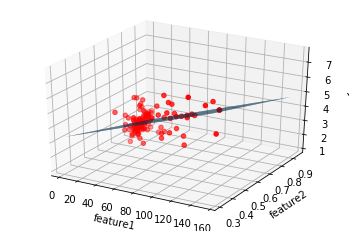

In [1154]:
# Plota os pontos e o plano em 3D

# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = treino["2008_mortalidade infantil"]
feature2 = treino["2008_idh"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = funcao(eixo_x, eixo_y)
fit_z

plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

In [1155]:
#Pega as features e aplica na função que já usa os parâmetros
#faz a predição - que será calculada para cada linha

feature1 = teste["2008_mortalidade infantil"]
feature2 = teste["2008_idh"]

valores_estimados_fertilidade_teste = funcao(feature1, feature2)
valores_estimados_fertilidade_teste

country
Austria                           1.521946
Myanmar                           4.118771
Seychelles                        2.164331
Hungary                           1.765840
Spain                             1.602830
Thailand                          2.280782
Sierra Leone                      6.914677
Guinea-Bissau                     5.636297
Senegal                           4.386405
Gambia                            4.686520
Liberia                           5.146740
Israel                            1.541193
Guinea                            5.697757
Equatorial Guinea                 4.999501
Kuwait                            1.967058
Lithuania                         1.782899
Burundi                           5.204141
Djibouti                          4.647525
Timor-Leste                       3.780507
Peru                              2.440755
Guatemala                         3.176888
Gabon                             3.649154
Bosnia and Herzegovina            2.128534
Bah

In [1156]:
#Calculando a média e desvio padrão dos valores estimados
valores_estimados_fertilidade_teste.describe()

count    45.000000
mean      3.281205
std       1.417588
min       1.460856
25%       2.128534
50%       2.712539
75%       4.386405
max       6.914677
dtype: float64

In [1157]:
#Com a predição em mãos, é necessário fazer a análise dos resíduos
#Calculando os resíduos
residuos = teste['2008_fertilidade'] - valores_estimados_fertilidade_teste

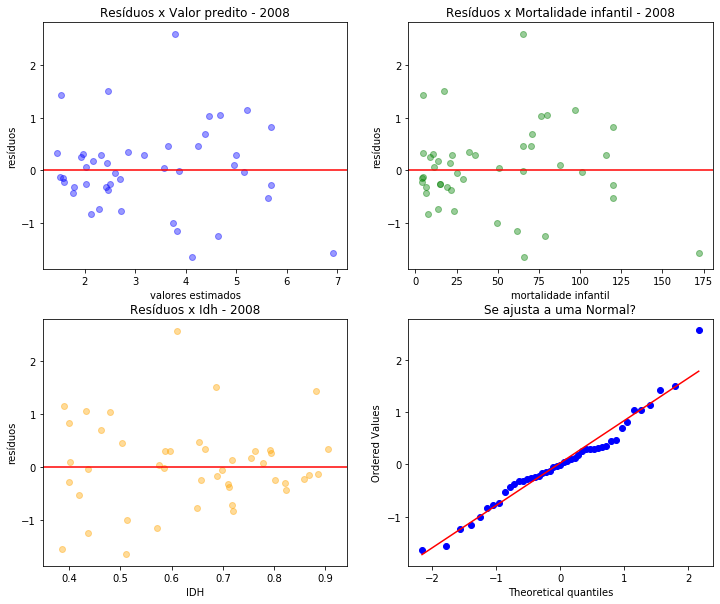

In [1158]:
#PLotando os gráficos para analisar os resíduos

fig = plt.figure(figsize=(12, 10)) #tamanho das figuras

#valores estimados pelos resíduos
plt.subplot(2, 2, 1) #quant de linhas, quant colunas e "índice"
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(valores_estimados_fertilidade_teste, residuos, c='blue', alpha=0.4)
plt.title('Resíduos x Valor predito - 2008')
plt.xlabel('valores estimados')
plt.ylabel('resíduos')

plt.subplot(2, 2, 2) 
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(feature1, residuos, c='green', alpha=0.4)
plt.title('Resíduos x Mortalidade infantil - 2008')
plt.xlabel('mortalidade infantil')
plt.ylabel('resíduos')

plt.subplot(2, 2, 3) 
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(feature2, residuos, c='orange', alpha=0.4)
plt.title('Resíduos x Idh - 2008')
plt.xlabel('IDH')
plt.ylabel('resíduos')

#Plota um gráfico para verificar se os resíduos se comportam como uma normal
plt.subplot(2, 2, 4)
probplot(residuos, dist='norm', plot=plt)
plt.title('Se ajusta a uma Normal?')

plt.show()

Interpretando os gráficos acima, a variância está crescendo muito pouco em relação a magnitude dos eixos X e Y, 
ou seja, dos resíduos em relação aos valores estimados, mortalidade infantil e IDH. Indicando que a suposição da 
hemosticidade deve estar correta.

O quarto gráfico é um indicativo de que a variável teórica se aproxima de uma normal

Respondendo a nossa pergunta, os fatores escolhidos que impactam na taxa de fertilidade dos países são:
- Mortalidade infantil;
- IDH.

Deste modo, podemos prever a taxa de fertilidade a partir das variáveis IDH e Mortalidade infantil

## Modelo de predição 2:
### K Vizinhos mais próximos

O segundo método que será utilizado é o K vizinhos mais próximos, no qual o algorítimo busca agrupar dados a partir da proximidade deles no gráfico e de um valor K de vizinhos, e a partir desses agrupamentos fazer as predições futuras.

In [1159]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [1160]:
#Carrega os dados de treino e teste já separados:
treino2 = treino2[['2008_fertilidade', '2008_mortalidade infantil', '2008_idh']]
teste2 = teste2[['2008_fertilidade', '2008_mortalidade infantil', '2008_idh']]

x_treino = treino2[['2008_mortalidade infantil', '2008_idh']]
y_treino = treino2['2008_fertilidade']

x_teste = teste2[['2008_mortalidade infantil', '2008_idh']]
y_teste = teste2['2008_fertilidade'] 

In [1171]:
#Aplica os Kvizinhos
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    modelo = neighbors.KNeighborsRegressor(n_neighbors = K)

    modelo.fit(x_treino, y_treino)  #fit the model
    predicao = modelo.predict(x_teste) #make prediction on test set
    erro = sqrt(mean_squared_error(y_teste, predicao)) #calculate rmse
    rmse_val.append(erro) #store rmse values
    #print('RMSE valor para k= ' , K , 'é:', erro)

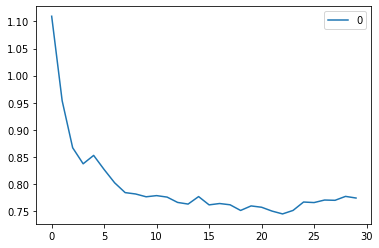

In [1162]:
#O menor valor RMSE para xK é 0.6750290276690012 --> 23K

#plotting the rmse values against k values
curva = pd.DataFrame(rmse_val) #elbow curve 
curva.plot()

In [1163]:
#predição no teste
predicao = modelo.predict(x_teste)
predicao

array([1.627     , 3.99966667, 2.00433333, 1.65233333, 1.627     ,
       2.00433333, 5.08866667, 5.08866667, 4.116     , 4.45333333,
       4.937     , 1.627     , 5.08866667, 5.08866667, 1.85133333,
       1.68633333, 4.89733333, 4.35466667, 3.99966667, 2.506     ,
       3.044     , 3.99966667, 1.726     , 1.76233333, 3.41      ,
       2.19466667, 5.08866667, 4.23266667, 2.506     , 2.62666667,
       2.61733333, 1.84666667, 4.55333333, 2.033     , 3.41      ,
       4.116     , 1.627     , 2.58533333, 3.72566667, 2.044     ,
       3.99966667, 2.77466667, 1.627     , 2.898     , 2.371     ])

In [1165]:
#Calculando a média e desvio padrão dos valores estimados
stats.describe(predicao)

DescribeResult(nobs=45, minmax=(1.6269999999999998, 5.088666666666666), mean=3.1226074074074077, variance=1.5539914863075188, skewness=0.276100627094103, kurtosis=-1.4120730268747126)

In [1168]:
#Com a predição em mãos, é necessário fazer a análise dos resíduos
#Calculando os resíduos
residuos_2 = teste['2008_fertilidade'] - predicao
residuos_2

country
Austria                          -0.237000
Myanmar                          -1.529667
Seychelles                        0.335667
Hungary                          -0.322333
Spain                            -0.247000
Thailand                         -0.454333
Sierra Leone                      0.261333
Guinea-Bissau                     0.021333
Senegal                           0.964000
Gambia                            1.286667
Liberia                           0.173000
Israel                            1.343000
Guinea                            0.331333
Equatorial Guinea                 0.201333
Kuwait                            0.428667
Lithuania                        -0.216333
Burundi                           1.452667
Djibouti                         -0.954667
Timor-Leste                       2.360333
Peru                              0.064000
Guatemala                         0.426000
Gabon                             0.110333
Bosnia and Herzegovina           -0.426000
Bah

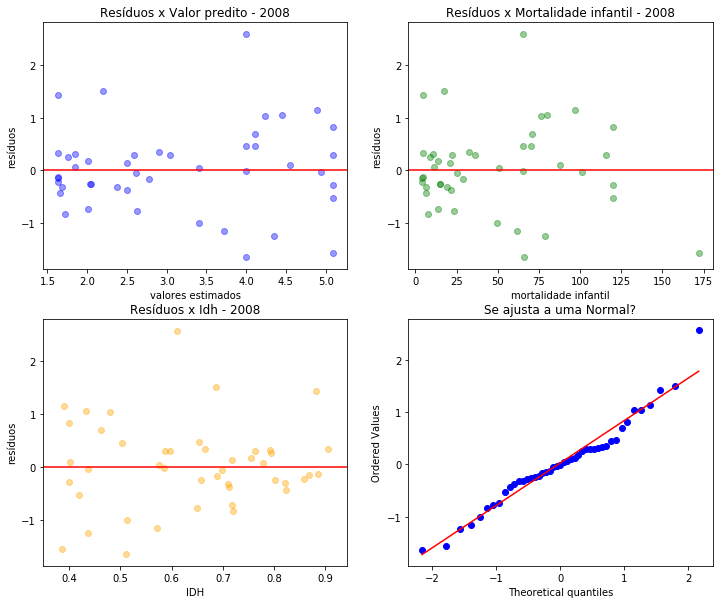

In [1169]:
#PLotando os gráficos para analisar os resíduos

fig = plt.figure(figsize=(12, 10)) #tamanho das figuras
feature1 = teste["2008_mortalidade infantil"]
feature2 = teste["2008_idh"]

#valores estimados pelos resíduos
plt.subplot(2, 2, 1) #quant de linhas, quant colunas e "índice"
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(predicao, residuos, c='blue', alpha=0.4)
plt.title('Resíduos x Valor predito - 2008')
plt.xlabel('valores estimados')
plt.ylabel('resíduos')

plt.subplot(2, 2, 2) 
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(feature1, residuos, c='green', alpha=0.4)
plt.title('Resíduos x Mortalidade infantil - 2008')
plt.xlabel('mortalidade infantil')
plt.ylabel('resíduos')

plt.subplot(2, 2, 3) 
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(feature2, residuos, c='orange', alpha=0.4)
plt.title('Resíduos x Idh - 2008')
plt.xlabel('IDH')
plt.ylabel('resíduos')

#Plota um gráfico para verificar se os resíduos se comportam como uma normal
plt.subplot(2, 2, 4)
probplot(residuos, dist='norm', plot=plt)
plt.title('Se ajusta a uma Normal?')

plt.show()

Interpretando os gráficos acima, a variância está crescendo muito pouco em relação a magnitude dos eixos X e Y, 
ou seja, dos resíduos em relação aos valores estimados, mortalidade infantil e IDH. Indicando que a suposição da 
hemosticidade deve estar correta.

O quarto gráfico é um indicativo de que a variável teórica se aproxima de uma normal

Respondendo a nossa pergunta, os fatores escolhidos que impactam na taxa de fertilidade dos países são:
- Mortalidade infantil;
- IDH.

Deste modo, podemos prever a taxa de fertilidade a partir das variáveis IDH e Mortalidade infantil

## Comparando os dois modelos 

Usando o indicativo calculando o erro RMSE,
- para os K vizinhos: 0.6750290276690012
- para a Regressão linear: 0.799285990747848

Assim, podemos ter uma indicativa de que o método de K vizinhos, utilizando K=23, é mais eficiente que a Regressão Linear para prever os valores de 

In [1176]:
erro = sqrt(mean_squared_error(y_teste, valores_estimados_fertilidade_teste)) #calculate rmse
erro

0.799285990747848